The main goal of this first TD is to get familiar with Google Colab. 

We will also take a look to the dataset with which we will work on the next 5 courses. 

Colab is a free notebook environment that runs entirely in the cloud. It lets you edit documents, the way you work with Google Docs. Colab supports many popular machine learning libraries which can be easily loaded in your notebook.

# Notebook Interface

For the ones who have never used a Notebook like Jupyter, let's explore some useful tools.

A **cell** is a container for text to be displayed in the notebook or code to be executed by the notebook’s kernel.

There are two main cell types that we will cover:

*   A Code cell contains code to be executed in the kernel. When the code is run, the notebook displays the output below the code cell that generated it.
*   A Text cell contains text formatted using Markdown and displays its output in-place when the Text cell is run.

Let’s test it out with a classic hello world example:

Type `print('Hello World!')` into the next Code cell and click the run button located on the left part of the cell or press Ctrl + Enter.

In [1]:
print('Hello World!')

Hello World!


When we run the cell, its output is displayed below and the label to its left will have changed from `In [ ]` to `In [1]`.

The number inside the square brackets indicates the order in which the cell was ran; the first cell has a 1 because it was the first cell that we ran. We can run each cell individually at anytime and those numbers will change.

You can always tell the difference between Code and Text cells because Code cells have that label on the left and Text cells do not.

# Setting up your Drive

**Create a folder for your project.**

Technically speaking, this step isn’t totally necessary if you want to just start working in Colab. However, since Colab is working off of your drive, it’s not a bad idea to specify the folder where you want to work. You can do that by going to your Google Drive and clicking “New” and then creating a new folder called *CVML_MIAGE*

<img src="https://miro.medium.com/max/450/1*Rp17M-6CBfynldko2V4jmg.png" width=200/>


All the lines of code in this lab will assume you can read and write the files from the folder *CVML_MIAGE* located in your Drive account. For this reason, is important you grant access to your Drive files from this notebook. This will also store all the modifications in your Drive account. 

To mount your drive execute the following:

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run the cell, click the link, copy the code on the page, paste it in the box, hit enter, and you will see this when you have successfully mounted your drive

<img src="https://miro.medium.com/max/875/1*VrRLOThfoTpy_2ruTzV3yg.png" width=500/>

You can also see file hierarchy by clicking the *folder* icon at top left below the control buttons (CODE, TEXT). (You may need to hit “refresh.”) Plus, you can reach your drive any time with

In [11]:
!ls "/content/drive/My Drive/"

 Archives			    'MIAGE L3'	'Programme GYM.gdoc'   Vietnam
 CVML_MIAGE			    'MIAGE M1'	 Stage_DUT
 Documents			    'MIAGE M2'	 Stats.gsheet
"Les Chevaliers de l'Informatique"  'Nico CV'	'TO DO.gdoc'


# Dataset

For the next TD we will use a dataset of famous people's faces. 

Run the following lines to download and unzip the dataset:

In [7]:
!wget --no-check-certificate -r 'http://www.i3s.unice.fr/~sanabria/files/dataset.zip' -O dataset.zip
!unzip -qq dataset.zip -d /content/drive/'My Drive'/CVML_MIAGE/


will be placed in the single file you specified.

--2020-09-15 08:02:14--  http://www.i3s.unice.fr/~sanabria/files/dataset.zip
Resolving www.i3s.unice.fr (www.i3s.unice.fr)... 134.59.130.2
Connecting to www.i3s.unice.fr (www.i3s.unice.fr)|134.59.130.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42954631 (41M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]  40.96M  3.71MB/s    in 21s     

2020-09-15 08:02:37 (1.96 MB/s) - ‘dataset.zip’ saved [42954631/42954631]

FINISHED --2020-09-15 08:02:37--
Total wall clock time: 22s
Downloaded: 1 files, 41M in 21s (1.96 MB/s)


Inside the folder *CVML_MIAGE* you will see a folder *dataset*. Inside this folder there is a folder per famous person containing several images of their faces.

Let's see all the famous people available in the dataset. Each person will be a class in our dataset.

In [12]:
!ls /content/drive/'My Drive'/CVML_MIAGE/dataset

Arsene_Wenger  Kareena_Kapoor_Khan  Luis_Suarez    Park_Bo-young
Carlo_Conti    Kimora_Lee_Simmons   Martha_Reeves  Sergio_Aguero
Julia_Gorges   Lucie_Bila	    Marvin_Humes   Thomas_Muller


Let's explore how many images we have per class

In [6]:
import pickle 
import os
dataset_path = "/content/drive/My Drive/CVML_MIAGE/dataset/"
for class_name in os.listdir(dataset_path):
  nb_images_per_class = len(os.listdir(dataset_path + class_name))
  print(class_name, nb_images_per_class)

Arsene_Wenger 580
Carlo_Conti 573
Julia_Gorges 521
Kareena_Kapoor_Khan 761
Kimora_Lee_Simmons 576
Lucie_Bila 564
Luis_Suarez 614
Martha_Reeves 530
Marvin_Humes 584
Park_Bo-young 520
Sergio_Aguero 530
Thomas_Muller 510


The images of our dataset have size 100x100.

In the following labs, we will use opencv library to manage the images. 

Let's see how to readn and show images in Google Colab using opencv.

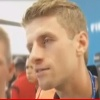

In [7]:
from google.colab.patches import cv2_imshow
import cv2
import glob

class_to_see = "Thomas_Muller"
path_files_per_class = glob.glob(dataset_path + class_to_see + "/*")
image_id_to_see = 400
image_path = path_files_per_class[image_id_to_see]

##Read the image 
image = cv2.imread(image_path)

## Show the image
cv2_imshow(image)


You can check other classes and other images:

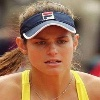

In [8]:
class_to_see = "Julia_Gorges" ## Choose the class you want to explore
path_files_per_class = glob.glob(dataset_path + class_to_see + "/*")
image_id_to_see =  100## Choose the image id you want to explore
image_path = path_files_per_class[image_id_to_see]

##Read the image 
image = cv2.imread(image_path)

## Show the image
cv2_imshow(image)

With opencv you can also read the images in black and white format.

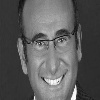

In [9]:
class_to_see = "Carlo_Conti" ## Choose the class you want to explore
path_files_per_class = glob.glob(dataset_path + class_to_see + "/*")
image_id_to_see =  100 ## Choose the image id you want to explore
image_path = path_files_per_class[image_id_to_see]

##Read the image in Black and White
image = cv2.imread(image_path, 0)

## Show the image
cv2_imshow(image)

Another useful tool in opencv is the resize method.

For the different methods we will explore in this class, we might need to change the size of the input image.

Original Image


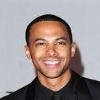

Resized Image


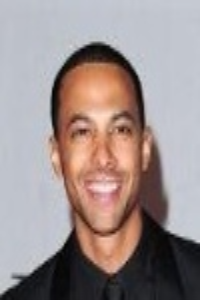

In [10]:
class_to_see = "Marvin_Humes" ## Choose the class you want to explore
path_files_per_class = glob.glob(dataset_path + class_to_see + "/*")
image_id_to_see = 50 ## Choose the image id you want to explore
image_path = path_files_per_class[image_id_to_see]

##Read the image 
image = cv2.imread(image_path)

print("Original Image")
cv2_imshow(image)

## Resizing
new_size_rows = 200
new_size_columns = 300
new_image = cv2.resize(image, (new_size_rows, new_size_columns))
print("Resized Image")
cv2_imshow(new_image)

# Project: Person Identification

The goal of our project is to identify the person of the picture. To make it easier, we will try to identify between two persons.

Choose two classes:

In [11]:
all_classes = os.listdir(dataset_path)
print('all available classes:\n',all_classes)

all available classes:
 ['Arsene_Wenger', 'Carlo_Conti', 'Julia_Gorges', 'Kareena_Kapoor_Khan', 'Kimora_Lee_Simmons', 'Lucie_Bila', 'Luis_Suarez', 'Martha_Reeves', 'Marvin_Humes', 'Park_Bo-young', 'Sergio_Aguero', 'Thomas_Muller']


In [13]:
chosen_classes = ['Julia_Gorges', 'Sergio_Aguero']

Usually in Machine Learning, *X* represents the input features and *y* represents the class.

Let's gather all the image paths of our two persons dataset:


In [14]:
X = []
for Sergio_Aguero in chosen_classes:
  class_path = dataset_path + Sergio_Aguero
  for image_path in glob.glob(class_path + "/*.jpg"):
    X.append(image_path)

Now, let's create our *y* containing the class of each of our image dataset:

In [15]:
y = []
for image_path in X:
  y.append(image_path.split('/')[-2])
print(y)

['Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_

Let's take a look to the size of our dataset:

In [16]:
print('data array length:',len(X))
print('class array length:',len(y))

print('X:',X)
print('y:',y)

data array length: 1051
class array length: 1051
X: ['/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0002_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0003_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0004_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0005_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0006_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0007_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0008_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0009_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0010_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0011_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0012_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0013_01.jpg', '/content/drive/My Drive/CVML_MIAGE/dataset/Julia_Gorges/0014_01.jpg', '/content/drive/My Drive

One important comment to highlight in Machine Learning is that the classes are usually represented by numerical values instead of text values. Then instead of using the name of the people, we will use 0 for the first person and 1 for the second person.

In [ ]:
## Write the code to create a new y vector, where it has 0 instead of the first person name and 1 instead of the second person name
y_num = []
for y_string in y:
  if chosen_classes[0] in y:
    y.append(0)
  elif chosen_classes[1] in y:
    y.append(1)

Scikit-learn is a free software machine learning library for Python. It provides many useful methods and algorithms. 

We will start using the *preprocessing* package to replace the code you did in the previous cell.

In [2]:
from google.colab.patches import cv2_imshow
import cv2
import glob
import pickle 
import os
dataset_path = "/content/drive/My Drive/CVML_MIAGE/dataset/"

all_classes = os.listdir(dataset_path)

chosen_classes = ['Julia_Gorges', 'Sergio_Aguero']

X = []
for Sergio_Aguero in chosen_classes:
  class_path = dataset_path + Sergio_Aguero
  for image_path in glob.glob(class_path + "/*.jpg"):
    X.append(image_path)

y = []
for image_path in X:
  y.append(image_path.split('/')[-2])
print(y)

Arsene_Wenger 580
Carlo_Conti 573
Julia_Gorges 521
Kareena_Kapoor_Khan 761
Kimora_Lee_Simmons 576
Lucie_Bila 564
Luis_Suarez 614
Martha_Reeves 530
Marvin_Humes 584
Park_Bo-young 520
Sergio_Aguero 530
Thomas_Muller 510
['Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges', 'Julia_Gorges

In [3]:
'''
change string labels into numbers
'''
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
print(y)

[0 0 0 ... 1 1 1]


As we saw in the slides of the class, the dataset is usually splitted in three different parts Train, Test and Validation.

Let's do the code to split the dataset: 80% for train, 10% for test and 10% for validation.

In [ ]:
## Code to split the dataset
X_train = 0.8
X_test = 0.1
X_val = 0.1

y_train = 0.8
y_test = 0.1
y_val = 0.1

print('training samples:',len(X_train))
print('testing samples:',len(X_test))
print('validation samples:',len(X_val))

Scikit-learn also provides a package to split the dataset

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

print('training samples:',len(X_train))
print('testing samples:',len(X_test))
print('validation samples:',len(X_val))

training samples: 840
testing samples: 105
validation samples: 106


Now, let's read the images from our dataset. 

We will start with the images in black and white in order to have less parameters to process.

In [5]:
import numpy as np
def read_images(X):
  X_bw = []
  for image_path in X:
    image = cv2.imread(image_path,0) ##... ## Read image in black and white
    X_bw.append(image)
  return np.asarray(X_bw)

In [7]:
X_train_bw = read_images(X_train)
X_test_bw = read_images(X_test)
X_val_bw = read_images(X_val)

# TD1: Task

Choose two "easy" classes from the dataset to replicate the creation of the dataset.

We will start with simple Machine Learning algorithms then it would be better if you choose two classes easy to identify. Like one man and one woman or two people with clearly different facial characteristics. 

Lucie_Bila


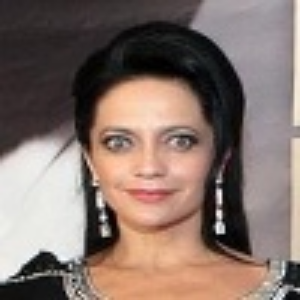

Carlo_Conti


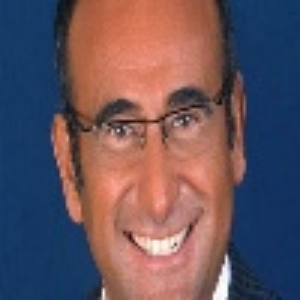

training samples: 1819
testing samples: 227
validation samples: 228


In [36]:
from google.colab.patches import cv2_imshow
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import glob
import pickle 
import os
dataset_path = "/content/drive/My Drive/CVML_MIAGE/dataset/"

#Importation du dataset
all_classes = os.listdir(dataset_path)


#Personnes choisies pour la comparaison
person1 = 'Lucie_Bila'
person2 = 'Carlo_Conti'
chosen_classes = [person1, person2]

#-------------Affichage des personnes choisies-------------#

class_to_see = person1
path_files_per_class = glob.glob(dataset_path + class_to_see + "/*")
image_id_to_see = 100
image_path = path_files_per_class[image_id_to_see]

#Lecture de l'image
image = cv2.imread(image_path)
height, width, depth = image.shape

#Redimensionnage 
new_size_rows = width*3
new_size_columns = height*3
new_image = cv2.resize(image, (new_size_rows, new_size_columns))
print(person1)
cv2_imshow(new_image)

class_to_see = person2
path_files_per_class = glob.glob(dataset_path + class_to_see + "/*")
image_path = path_files_per_class[image_id_to_see]

#Lecture de l'image 
image = cv2.imread(image_path)
height, width, depth = image.shape

#Redimensionnage 
new_size_rows = width*3
new_size_columns = height*3
new_image = cv2.resize(image, (new_size_rows, new_size_columns))
print(person2)
cv2_imshow(new_image)

#---------------------------------------------------------#


#Récupération des chemins de nos images en X
X = []
for person1 in chosen_classes:
  class_path = dataset_path + person1
  for image_path in glob.glob(class_path + "/*.jpg"):
    X.append(image_path)

for person2 in chosen_classes:
  class_path = dataset_path + person2
  for image_path in glob.glob(class_path + "/*.jpg"):
    X.append(image_path)

#Association de chaque image à sa classe en Y
y = []
for image_path in X:
  y.append(image_path.split('/')[-2])

#On met des 0 à la place du nom de person1 et des 1 à la place du nom de person2
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

#Séparations de nos datasets en 3 partie de respectivement 80%, 10% et 10%
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

#Affichage ldu nombre de données dans chaque partie du dataset
print('training samples:',len(X_train))
print('testing samples:',len(X_test))
print('validation samples:',len(X_val))

#Affichage de la taille des 3 différents ensembles du dataset, l'entrainement, le test et la validation
X_train_bw = read_images(X_train)
X_test_bw = read_images(X_test)
X_val_bw = read_images(X_val)